In [ ]:
! pip install gradio 

In [2]:
import gradio as gr

In [4]:
def hello_world(name):
  return "Hello.... 👋 ..."+name + "!!!!"

In [5]:
hello_world("1littlecoder")

'Hello.... 👋 ...1littlecoder!!!!'

In [6]:
interface = gr.Interface(fn = hello_world, inputs = 'text', outputs = "text")

In [7]:
interface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://36748.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://36748.gradio.app')

In [14]:
interface = gr.Interface(fn = hello_world, 
                         inputs = gr.inputs.Textbox(lines = 10, placeholder="Enter your input here....."), 
                         outputs = "text")

In [15]:
interface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://44140.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://44140.gradio.app')

In [16]:
import gradio as gr
import numpy as np

def sepia(input_img):
  sepia_filter = np.array([[.393, .769, .189],
                           [.349, .686, .168],
                           [.272, .534, .131]])
  sepia_img = input_img.dot(sepia_filter.T)
  sepia_img /= sepia_img.max()                          
  return sepia_img

iface = gr.Interface(sepia, gr.inputs.Image(shape=(200, 200)), "image")

iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15052.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7863/',
 'https://15052.gradio.app')

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://22580.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7866/',
 'https://22580.gradio.app')

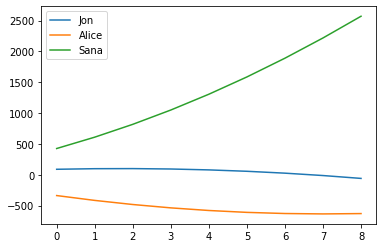

In [19]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sales_projections(employee_data):
    sales_data = employee_data.iloc[:, 1:4].astype("int").to_numpy()
    regression_values = np.apply_along_axis(lambda row: 
        np.array(np.poly1d(np.polyfit([0,1,2], row, 2))), 0, sales_data)
    projected_months = np.repeat(np.expand_dims(
        np.arange(3,12), 0), len(sales_data), axis=0)
    projected_values = np.array([
        month * month * regression[0] + month * regression[1] + regression[2]
        for month, regression in zip(projected_months, regression_values)])
    plt.plot(projected_values.T)
    plt.legend(employee_data["Name"])
    return plt.gcf()

iface = gr.Interface(sales_projections, 
    gr.inputs.Dataframe(
        headers=["Name", "Jan Sales", "Feb Sales", "Mar Sales"],
        default=[["Jon", 12, 100, 18], ["Alice", 14, 17, 2], ["Sana", 8, 9.5, 12]]
    ),
    [
    
        "plot"
    ],
    description="Enter sales figures for employees to predict sales trajectory over year."
)
iface.launch()

In [39]:
import gradio as gr

In [40]:
def bmi(name,height,weight,feeling):
  bmi_val = weight / ((height/100) ** 2)
  result_emoticon = "😀" if bmi_val < 30 else "😞"
  output_str = "Hello 👋 " + name + "... \n your BMI is ....." + str(bmi_val)
  txt = "Happy" if feeling else "Sad" 
  return(output_str, result_emoticon,txt)

In [41]:
interface = gr.Interface(
    fn = bmi,
    inputs = ["text", gr.inputs.Slider(1,200,label = "Height in CMs"), gr.inputs.Slider(1,100,label = "Weight in Kg"),
              gr.inputs.Checkbox("Your Feeling Today")],
    outputs = ['text','text','text'],
    examples = [['1littlecoder',100,50,True],
                ['Mars',120,20,True],
                ['🌝 ',200,50,False]],
    #theme = 'darkhuggingface',
    css = """
    body {background-color : yellow}
    """
)

In [50]:
interface.launch(auth = ('user','1littlecoder'), auth_message = "Check your <strong>Login details</strong> sent to your <i>email 📧 </i>")

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://42864.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7882/',
 'https://42864.gradio.app')

In [10]:
import pandas as pd

In [11]:
pd.read_csv("/content/flagged/log.csv")

,name,Height in CMs,Weight in Kg,feeling,Output 1,Output 2,Output 3,timestamp
0,sdfsdf,1,1,Your Feeling Today,Hello 👋 sdfsdf... \n your BMI is .....10000.0,😞,Happy,2021-11-22 06:54:19.003489
1,sdfsdf,150,77,False,Hello 👋 sdfsdf... \n your BMI is .....34.22222...,😞,Sad,2021-11-22 06:54:25.189483


In [25]:
import gradio as gr
import random

def chat(message):
    history = gr.get_state() or []
    if message.startswith("How many"):
        response = random.randint(1,10)
    elif message.startswith("How"):
        response = random.choice(["Great", "Good", "Okay", "Bad"])
    elif message.startswith("Where"):
        response = random.choice(["Here", "There", "Somewhere"])
    else:
        response = "I don't know"
    history.append((message, response))
    gr.set_state(history)
    html = ""
    for user_msg, resp_msg in history:
        html += f"{user_msg}"
        html += f"{resp_msg}"
    html += ""
    return html

iface = gr.Interface(chat, "text", "html", css="""
    .chatbox {display:flex;flex-direction:column}
    .user_msg, .resp_msg {padding:4px;margin-bottom:4px;border-radius:4px;width:80%}
    .user_msg {background-color:cornflowerblue;color:white;align-self:start}
    .resp_msg {background-color:lightgray;align-self:self-end}
""", allow_screenshot=False, allow_flagging=False)
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://59486.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7869/',
 'https://59486.gradio.app')